In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
ds=pd.read_csv("Social_Network_Ads.csv")
ds

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [5]:
x=ds[["Age","EstimatedSalary"]]  #independent
y=ds[["Purchased"]]              #dependent

In [7]:
#standard scalar:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [8]:
#spliting data to training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


In [9]:
#random forest classifier:
from sklearn.ensemble import RandomForestClassifier
cls= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
cls.fit(x_train,y_train)

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
#predict for specifier value :
cls.predict(sc.transform([[30,187000]]))

C:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

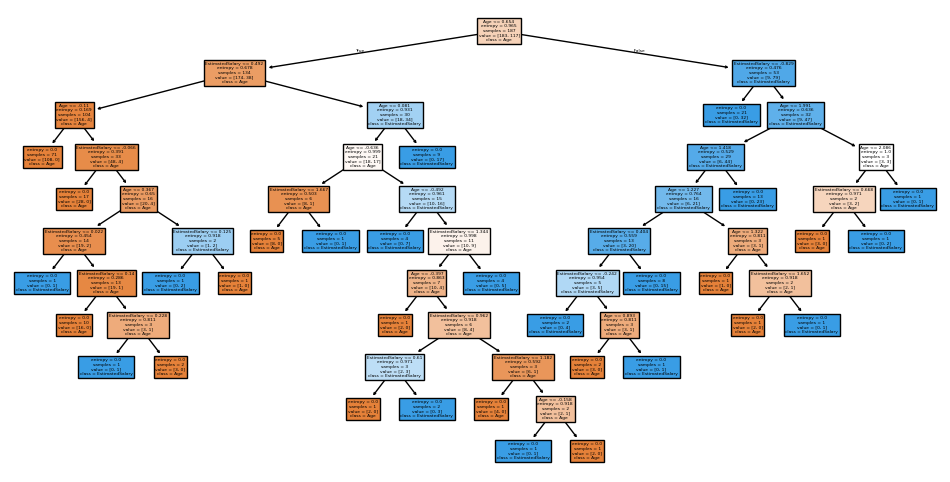

In [15]:
#plotted tree :
from sklearn.tree import plot_tree
plt.figure(figsize=(12,6))
plot_tree(cls.estimators_[0],filled=True,feature_names=("Age","EstimatedSalary"),class_names=["Age","EstimatedSalary"])
plt.show()

In [17]:
#prediction on testing data:
y_pred=cls.predict(x_test)
print(y_pred)# prediction of algorithm
print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]
     Purchased
132          0
309          0
341          0
196          0
246          0
..         ...
146          1
135          0
390          1
264          1
364          1

[100 rows x 1 columns]


In [18]:
#making the confusion martix:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[63  5]
 [ 3 29]]


0.92